In [1]:
import pandas as pd
import numpy as np
import datetime

# Data Cleaning Utilities

Tukey rule for removing outliers

In [2]:
def tukey_range(values):
    
    alpha = 1.5
    sorted_values = sorted(values)
    
    # Q1
    q1_index = int(np.ceil(0.25 * len(values)))
    q1 = sorted_values[q1_index]
    
    # Q3
    q3_index = int(np.ceil(0.75 * len(values)))
    q3 = sorted_values[q3_index]
    
    # IQR
    iqr = q3 - q1
    
    return q1 - (alpha * iqr), q3 + (alpha * iqr)

Remove missing, invalid entries and outliers 

In [3]:
def clean_data(series):
    
    #Check if any NA values
    print("Missing Values:{}\n".format(len(series[series.isna()])))
    
    invalid_entries = series[series < 0].values
    print("Invalid entries: {}\n".format(invalid_entries))
    
    series = series[series >=0]
    lower_limit, upper_limit = tukey_range(series.values)
    print("Lower Range: {}, Upper Range: {}\n".format(lower_limit, upper_limit))
    
    outliers = list(series[series < lower_limit].values) + list(series[series > upper_limit].values)
    print("Total Outliers: {}\n".format(len(outliers)))
    print("Outliers: \n{}\n".format(outliers))
    
    outliers_index = list(series[series < lower_limit].index) + list(series[series > upper_limit].index)
    return series.drop(index = outliers_index)

# Cases

In [4]:
cases = pd.read_csv("dataset/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

In [5]:
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,08/17/2020,MD,100715,NaN,NaN,503,0.0,3765,3616.0,149.0,3,0.0,08/19/2020 12:00:00 AM,NaN,Agree
2,03/28/2022,VT,107785,NaN,NaN,467,35.0,585,NaN,NaN,0,0.0,03/29/2022 01:30:11 PM,Not agree,Not agree
3,03/18/2020,ME,44,44.0,0.0,12,0.0,0,0.0,0.0,0,0.0,03/20/2020 12:00:00 AM,Agree,Agree
4,02/06/2020,NE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [6]:
cases["submission_date"] = pd.to_datetime(cases["submission_date"])

# Georgia

In [7]:
georgia_df = cases[cases["state"].isin(['GA'])].sort_values(by = "submission_date").set_index("submission_date")
georgia_case_death = georgia_df[["new_case", "new_death"]]

In [8]:
georgia_case_death

,new_case,new_death
submission_date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-05-02,0,0
2022-05-03,0,0
2022-05-04,6525,163


<AxesSubplot:>

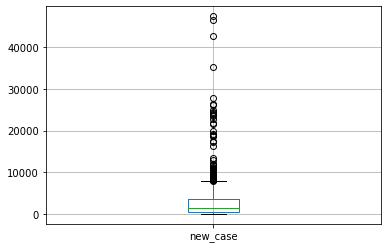

In [15]:
georgia_case_death.boxplot("new_case")

<AxesSubplot:>

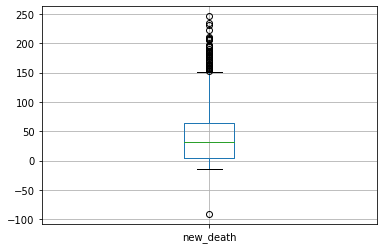

In [16]:
georgia_case_death.boxplot("new_death")

# Indiana

In [9]:
indiana_df = cases[cases["state"].isin(['IN'])].sort_values(by = "submission_date").set_index("submission_date")
indiana_case_death = indiana_df[["new_case", "new_death"]]

In [10]:
indiana_case_death

,new_case,new_death
submission_date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-05-02,1287,4
2022-05-03,0,0
2022-05-04,1815,0


<AxesSubplot:>

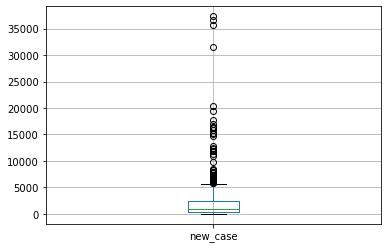

In [13]:
indiana_case_death.boxplot("new_case")

<AxesSubplot:>

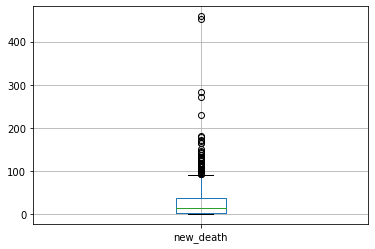

In [14]:
indiana_case_death.boxplot("new_death")

In [143]:
dfs = {"Georgia":georgia_case_death, "Indiana":indiana_case_death}
res = []
for state, df in dfs.items():
    print("State:{}".format(state))
    print("-------------------------------------------------")
    print("-------------------------------------------------")
    s = []
    for col in df.columns:
        print("Feature: {}".format(col))
        print("----------------------------------")
        clean_series = clean_data(df[col])
        # clean_series.index = df.index
        s.append(clean_series)
    res.append(pd.concat(s, axis = 1))
georgia, indiana = [r.dropna(subset = ["new_case", "new_death"]) for r in res]

State:Georgia
-------------------------------------------------
-------------------------------------------------
Feature: new_case
----------------------------------
Missing Values:0

Invalid entries: [-5]

Lower Range: -3912.5, Upper Range: 8019.5

Total Outliers: 68

Outliers: 
[8141, 9079, 10286, 9450, 9053, 11709, 11137, 10091, 9790, 13296, 11926, 8193, 9193, 8596, 9036, 9806, 8533, 8205, 8150, 8374, 8985, 8393, 9836, 9581, 9186, 10677, 10823, 11084, 10521, 9702, 8412, 12018, 8792, 8278, 9089, 10012, 9495, 26279, 13018, 19124, 24420, 23438, 47436, 17603, 24024, 23813, 26033, 46474, 24865, 18939, 24310, 19943, 35149, 12071, 27781, 22684, 18671, 42786, 16232, 17332, 21708, 18785, 21534, 10226, 8020, 8029, 8798, 11804]

Feature: new_death
----------------------------------
Missing Values:0

Invalid entries: [ -2  -2 -14 -91  -1  -1]

Lower Range: -81.0, Upper Range: 151.0

Total Outliers: 39

Outliers: 
[157, 187, 172, 163, 153, 222, 196, 171, 186, 179, 161, 184, 159, 210, 208, 169, 

In [147]:
georgia.reset_index().to_csv("georgia_cases_deaths.csv", index = False)
indiana.reset_index().to_csv("indiana_cases_deaths.csv", index = False)

In [180]:
# Calculating Outliers for all states 
# all_states_df = cases.sort_values(by = "submission_date").set_index("submission_date")
# all_states_case_death = all_states_df[["new_case", "new_death"]]
# s = []
# for col in all_states_case_death.columns:
#     print("Feature: {}".format(col))
#     print("----------------------------------")
#     clean_series = clean_data(all_states_case_death[col])
#     s.append(clean_series)
# pd.concat(s, axis = 1)

# Vaccinations

In [18]:
vaccinations = pd.read_csv("dataset/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv")

In [19]:
vaccinations.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
0,05/09/2022,19,NV,5994810,259000,2056700,3679110,0,194627,228652,...,80.2,1876120.0,64.8,4920847.0,170002.0,207105.0,605948.0,1097337.0,172768.0,67.0
1,05/09/2022,19,LA,8296850,325200,3394180,4577470,0,178473,211475,...,65.3,2488841.0,57.2,6261798.0,144038.0,190850.0,962252.0,1344351.0,181102.0,1136.0
2,05/09/2022,19,WI,11753545,452500,4409000,6892045,0,201867,235081,...,76.2,3822098.0,69.6,10334215.0,188171.0,214015.0,1338600.0,2181902.0,300650.0,946.0
3,05/09/2022,19,NE,4007410,150500,1405480,2451430,0,207165,247767,...,75.5,1231426.0,68.3,3223525.0,178734.0,222198.0,416495.0,724421.0,88778.0,1732.0
4,05/09/2022,19,OH,23378055,986300,8800240,13591515,0,199999,233764,...,67.6,6833069.0,62.1,17935233.0,163073.0,212561.0,2396695.0,3877700.0,553167.0,5507.0


In [20]:
vaccinations["Date"] = pd.to_datetime(vaccinations["Date"])

# Georgia

In [21]:
georgia_vaccines = vaccinations[vaccinations["Location"].isin(['GA'])].sort_values(by = "Date").set_index("Date")

In [23]:
georgia_vaccines['Lag'] = georgia_vaccines.Administered.shift(1).fillna(0)
georgia_vaccines['Daily Administered'] = georgia_vaccines.Administered - georgia_vaccines.Lag
georgia_vaccines['Daily Administered'] = clean_data(georgia_vaccines['Daily Administered'])

Missing Values:0

Invalid entries: [-22526.  -6270. -81248.]

Lower Range: -69345.5, Upper Range: 116506.5

Total Outliers: 25

Outliers: 
[149624.0, 151573.0, 202499.0, 181800.0, 118438.0, 415861.0, 128303.0, 147257.0, 171034.0, 158050.0, 119924.0, 182634.0, 127427.0, 137336.0, 121393.0, 118749.0, 163945.0, 163643.0, 163554.0, 120121.0, 118763.0, 139521.0, 135771.0, 156133.0, 160800.0]



<AxesSubplot:>

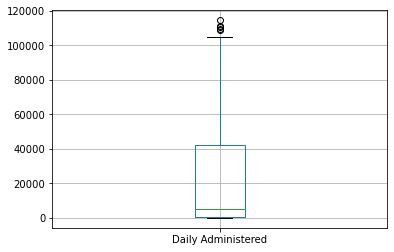

In [25]:
georgia_vaccines.boxplot('Daily Administered')

Outlier dates

In [209]:
georgia_vaccines['Daily Administered'][georgia_vaccines['Daily Administered'].isna()].index

DatetimeIndex(['2021-01-22', '2021-02-19', '2021-03-20', '2021-04-07',
               '2021-04-09', '2021-04-13', '2021-04-14', '2021-05-07',
               '2021-05-31', '2021-06-04', '2021-06-17', '2021-06-22',
               '2021-06-29', '2021-07-20', '2021-07-28', '2021-08-05',
               '2021-08-19', '2021-08-25', '2021-09-01', '2021-09-08',
               '2021-09-15', '2021-10-30', '2021-11-03', '2021-11-16',
               '2021-11-30', '2021-12-04', '2021-12-28', '2022-01-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [26]:
georgia_vaccines = georgia_vaccines['Daily Administered']
georgia_vaccines.dropna(inplace = True)

In [ ]:
georgia_vaccines.reset_index().to_csv("georgia_vaccinations.csv", index = False)

# Indiana

In [30]:
indiana_vaccines = vaccinations[vaccinations["Location"].isin(['IN'])].sort_values(by = "Date").set_index("Date")

In [31]:
indiana_vaccines['Lag'] = indiana_vaccines.Administered.shift(1).fillna(0)
indiana_vaccines['Daily Administered'] = indiana_vaccines.Administered - indiana_vaccines.Lag
indiana_vaccines['Daily Administered'] = clean_data(indiana_vaccines['Daily Administered'])

Missing Values:0

Invalid entries: []

Lower Range: -24250.0, Upper Range: 57734.0

Total Outliers: 17

Outliers: 
[145215.0, 68118.0, 62176.0, 98243.0, 96848.0, 57954.0, 63433.0, 68471.0, 58356.0, 71096.0, 71831.0, 60735.0, 66382.0, 66406.0, 58781.0, 60419.0, 223259.0]



Outlier dates

In [212]:
indiana_vaccines['Daily Administered'][indiana_vaccines['Daily Administered'].isna()].index

DatetimeIndex(['2021-02-13', '2021-02-19', '2021-02-24', '2021-02-25',
               '2021-03-13', '2021-03-26', '2021-04-02', '2021-04-03',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-05-07',
               '2021-07-03'],
              dtype='datetime64[ns]', name='Date', freq=None)

<AxesSubplot:>

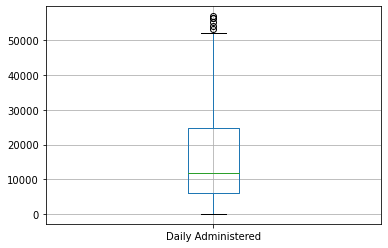

In [32]:
indiana_vaccines.boxplot('Daily Administered')

In [ ]:
indiana_vaccines = indiana_vaccines['Daily Administered']
indiana_vaccines.dropna(inplace = True)
indiana_vaccines.reset_index().to_csv("indiana_vaccinations.csv", index = False)

# Remarks

For cases dataset, we found 68 and 39 total outliers for new_cases and new_deaths features for Georgia. Similarly, we found 64 and 52 outliers for Indiana. There were in total 6 negative entries in Georgia dataset,which were removed as pert of data cleaning. 

For Vaccines dataset, we found 25 and 17 outliers respectively for Georgia and Indiana. In total, there were 3 negative entries in Georgia dataset, which were removed. 